# SODA 308 PROJECT - COMMENT SENTIMENT IMPACT ON VIDEO CATEGORIES
Group: Fatmah Almeer, Justin Maines, and Alvaro Tapia

In [ ]:
# Importing all the necessary packages and files
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy.io import loadmat

import warnings
# ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Retrieving and cleaning the datasets
Used the US videos dataset, and the US comments dataset.

In [ ]:
# Reading the datasets
US_stats = pd.read_csv(os.path.join('/content/drive/My Drive/SODA308', 'USvideos.csv'), error_bad_lines=False)
US_comments = pd.read_csv(os.path.join('/content/drive/My Drive/SODA308', 'UScomments.csv'), error_bad_lines=False)

Skipping line 2401: expected 11 fields, saw 21
Skipping line 2800: expected 11 fields, saw 21
Skipping line 5297: expected 11 fields, saw 12
Skipping line 5299: expected 11 fields, saw 12
Skipping line 5300: expected 11 fields, saw 12
Skipping line 5301: expected 11 fields, saw 12

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



In [ ]:
# Merging the comments with the videos
US_df = result_df = pd.merge(US_stats, US_comments, on='video_id', how='left')
US_df.head()

,video_id,title,channel_title,category_id,tags,views,likes_x,dislikes,comment_total,thumbnail_link,date,comment_text,likes_y,replies
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,trending 😉,3,0


In [ ]:
# Droping unwanted columns
US_df = US_df.drop(['tags', 'views', 'likes_x', 'dislikes', 'comment_total', 'thumbnail_link', 'date', 'likes_y', 'replies'], axis=1)

In [ ]:
# Cleaning dataset
US_df = US_df.drop_duplicates()
US_df = US_df.dropna()
print(US_df.shape)
US_df.head()

(460672, 5)


,video_id,title,channel_title,category_id,comment_text
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Logan Paul it's yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,I've been following you from the start of your...
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,MY FAN . attendance
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,trending 😉


# Calculating the Sentiment per comment per video
The source of the formula is the NLTK library, and more specifically, the VADER sentiment analysis tool within NLTK. This code is used to calculate the sentiment score (compound score) for comments in the 'comment_text' column of a DataFrame named US_df.

In [ ]:
nltk.download('vader_lexicon')

# Create an instance of the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get the sentiment of a comment
def get_sentiment(comment):
    scores = sid.polarity_scores(comment)
    sentiment = scores['compound']
    return sentiment

# Apply the function to the 'comment_text' column
US_df['comment_sentiment'] = US_df['comment_text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
US_df.head(10)

,video_id,title,channel_title,category_id,comment_text,comment_sentiment
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Logan Paul it's yo big day ‼️‼️‼️,0.0000
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,I've been following you from the start of your...,0.0000
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Say hi to Kong and maverick for me,0.0000
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,MY FAN . attendance,0.4648
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,trending 😉,0.0000
5,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,#1 on trending AYYEEEEE,0.0000
6,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,The end though 😭👍🏻❤️,0.0000
7,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,#1 trending!!!!!!!!!,0.0000
8,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Happy one year vlogaversary,0.5719
9,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,You and your shit brother may have single hand...,-0.7717


In [ ]:
# Averaging the comment sentiments to every unique video so every video has its own sentiment based on all comments.
avg_df = US_df
avg_df["average_sentiment"] = avg_df.groupby('video_id')['comment_sentiment'].transform('mean')

In [ ]:
avg_df.head(10)

,video_id,title,channel_title,category_id,comment_text,comment_sentiment,average_sentiment
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Logan Paul it's yo big day ‼️‼️‼️,0.0000,0.086394
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,I've been following you from the start of your...,0.0000,0.086394
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Say hi to Kong and maverick for me,0.0000,0.086394
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,MY FAN . attendance,0.4648,0.086394
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,trending 😉,0.0000,0.086394
5,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,#1 on trending AYYEEEEE,0.0000,0.086394
6,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,The end though 😭👍🏻❤️,0.0000,0.086394
7,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,#1 trending!!!!!!!!!,0.0000,0.086394
8,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Happy one year vlogaversary,0.5719,0.086394
9,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,You and your shit brother may have single hand...,-0.7717,0.086394


# Performing Data Integration and Selection
*   Removing all the repeated videos

*   Calculating Sentiment Label based on average sentiment

In [ ]:
# Drop duplicate 'user_id' values and keep only the first row (highest 'visits')
df = avg_df.drop_duplicates(subset='video_id', keep='first')
df

,video_id,title,channel_title,category_id,comment_text,comment_sentiment,average_sentiment
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Logan Paul it's yo big day ‼️‼️‼️,0.0000,0.086394
801,cLdxuaxaQwc,My Response,PewDiePie,22,Love you Pewdiepie don't apologize your fine,0.5126,-0.018240
1600,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,What if I wanna unlock my phone while in the b...,0.0000,0.070634
2400,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,Nothing's scarier than a guy replying to every...,0.0000,0.115586
3200,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,I'm sure I speak for everyone when I say the w...,0.3182,0.180963
...,...,...,...,...,...,...,...
2900192,mv4MRmwXJMM,Kygo - Kids in Love (Audio) ft. The Night Game,KygoOfficialVEVO,10,I hope kygo will do songs like stargazing and ...,0.8930,0.253038
2903564,7_GaeAoLMWY,Keyshia Cole Performs Incapable,Wendy Williams,24,🙄 that’s all she sing about is love songs n th...,0.7717,0.313223
2924730,S9VIKOuZcds,My Sweet Jax (Tribute to a Cat),Hot Dad,23,"I tried to laugh, but cried instead. In the l...",-0.9062,0.144990
2925632,a5NIg5yyHWo,Pawn Stars: An Original 1978 Superman Costume ...,HISTORY,24,Unlimited energy machine \nExpert: its worth A...,0.8591,0.198645


In [ ]:
# 1 for postive sentiment, 0 for negative sentiment
df["sentiment_label"] = df["average_sentiment"].apply(lambda x: 1 if x > 0 else 0)
df

,video_id,title,channel_title,category_id,comment_text,comment_sentiment,average_sentiment,sentiment_label
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,Logan Paul it's yo big day ‼️‼️‼️,0.0000,0.086394,1
801,cLdxuaxaQwc,My Response,PewDiePie,22,Love you Pewdiepie don't apologize your fine,0.5126,-0.018240,0
1600,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,What if I wanna unlock my phone while in the b...,0.0000,0.070634,1
2400,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,Nothing's scarier than a guy replying to every...,0.0000,0.115586,1
3200,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,I'm sure I speak for everyone when I say the w...,0.3182,0.180963,1
...,...,...,...,...,...,...,...,...
2900192,mv4MRmwXJMM,Kygo - Kids in Love (Audio) ft. The Night Game,KygoOfficialVEVO,10,I hope kygo will do songs like stargazing and ...,0.8930,0.253038,1
2903564,7_GaeAoLMWY,Keyshia Cole Performs Incapable,Wendy Williams,24,🙄 that’s all she sing about is love songs n th...,0.7717,0.313223,1
2924730,S9VIKOuZcds,My Sweet Jax (Tribute to a Cat),Hot Dad,23,"I tried to laugh, but cried instead. In the l...",-0.9062,0.144990,1
2925632,a5NIg5yyHWo,Pawn Stars: An Original 1978 Superman Costume ...,HISTORY,24,Unlimited energy machine \nExpert: its worth A...,0.8591,0.198645,1


# Methods for data integration

*   Matching category IDs with their category names in order to find the categories vs. average sentiment

*   Performing Correlation matrix to validate our findings and find potential correlations


In [ ]:
# Matching category IDs with their labels gathered from Youtube APIs
category_avg_df = df

category_df = category_avg_df[['category_id', 'average_sentiment']]
category_df = category_df.drop_duplicates(subset=['category_id'])

category_df = category_df.sort_values(by='average_sentiment', ascending=False)
category_df = category_df.reset_index(drop=True)

category_csv = pd.read_csv(os.path.join('/content/drive/My Drive/SODA308', 'categoryid_youtube.csv'), error_bad_lines=False)

category = pd.merge(left=category_df, right=category_csv, how='left', on='category_id')
category

,category_id,average_sentiment,names_category
0,29,0.439169,Nonprofits & Activism
1,15,0.226709,Pets & Animals
2,19,0.206182,Travel & Events
3,1,0.180963,Film & Animation
4,27,0.143359,Education
5,10,0.120580,Music
6,23,0.115586,Comedy
7,24,0.086394,Entertainment
8,26,0.078207,Howto & Style
9,28,0.070634,Science & Technology


Text(0.5, 1.0, 'Average Sentiment by Category')

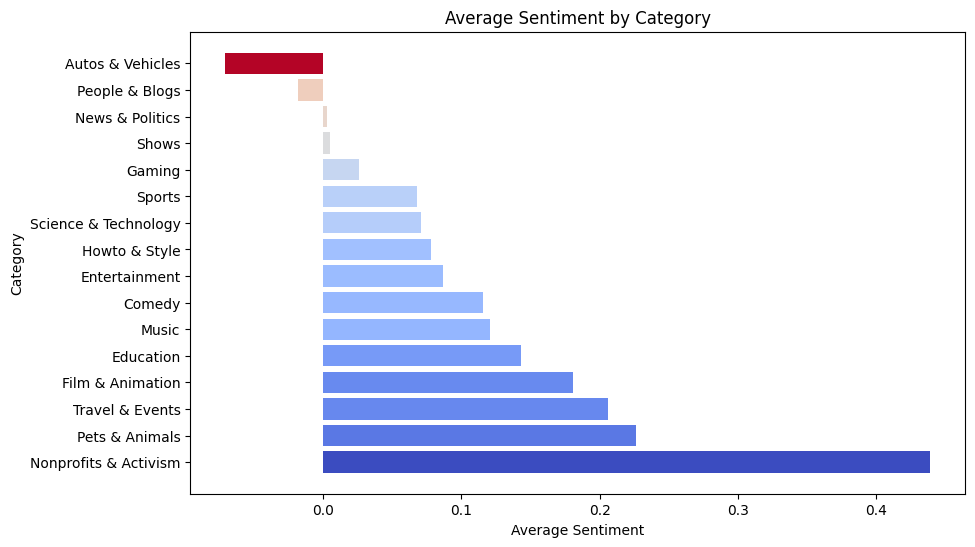

In [ ]:
# Creating the bar graph to show the relationship between parameters.
import matplotlib.pyplot as plt

# create a color map
cmap = plt.cm.get_cmap('coolwarm')

# normalize the sentiment values to the range of the color map
norm = plt.Normalize(category['average_sentiment'].min(), category['average_sentiment'].max())

# create a list of colors corresponding to the sentiment values
colors = [cmap(norm(sentiment)) for sentiment in category['average_sentiment']]

# reverse the order of the colors
colors = colors[::-1]

# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# create the horizontal bar plot
ax.barh(category['names_category'], category['average_sentiment'], color=colors)

# set the axis labels and title
ax.set_xlabel('Average Sentiment')
ax.set_ylabel('Category')
ax.set_title('Average Sentiment by Category')

# show the plots

                   category_id  comment_sentiment  average_sentiment  \
category_id           1.000000          -0.039843          -0.124579   
comment_sentiment    -0.039843           1.000000           0.376776   
average_sentiment    -0.124579           0.376776           1.000000   
sentiment_label      -0.110697           0.265128           0.631343   

                   sentiment_label  
category_id              -0.110697  
comment_sentiment         0.265128  
average_sentiment         0.631343  
sentiment_label           1.000000  


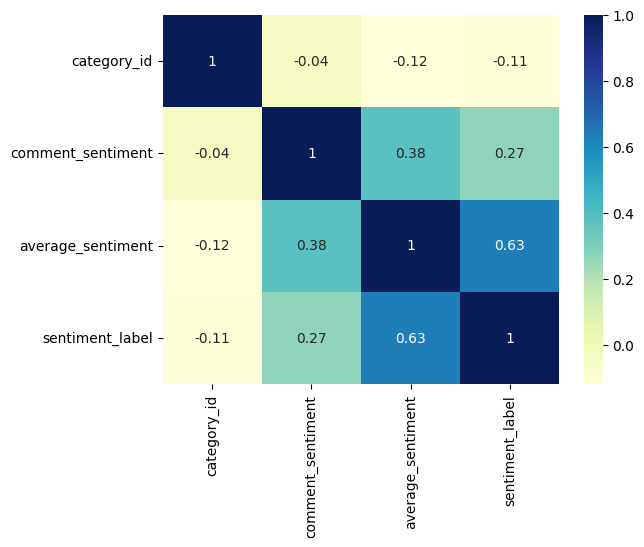

In [ ]:
# Creating Correlation Matrix

import matplotlib.pyplot as mp
import seaborn as sb
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())

# create a correlation matrix of the features
corr_matrix = round(df.corr(), 2)

# create heatmap
sb.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
mp.show()

# Extra or Future Work: Modeling the Dataset

*   Trained and Tested our data
*   Modeling our data



In [ ]:
# Splitting the Dataset

from sklearn.model_selection import train_test_split


# Feature selection based on ChatGPT for Methodology
x = df[['comment_sentiment', 'average_sentiment', 'sentiment_label']]
y = df['category_id']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

print(X_train.shape)
print(y_train.shape)

(1812, 3)
(1812,)


In [ ]:
# This is an ensemble learning method that combines multiple decision trees to make predictions.
# It is useful when there are non-linear relationships between the independent variables and the target variable.
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
clf.fit(X_train, y_train)

# Predict with the Random Forest model
y_pred = clf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rforest = accuracy_score(y_test, y_pred)
accuracy_rforest = round(accuracy_rforest, 4)

print("Accuracy: %.2f" % accuracy_rforest)

Accuracy: 0.18


In [ ]:
# This is a powerful regression model that uses a kernel function to map the input data to a higher-dimensional space.
from sklearn import svm

# Define the SVM model
clf = svm.SVC(kernel='rbf')

# Train the SVM model
clf.fit(X_train, y_train)

# Predict with the SVM model
y_pred = clf.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm = round(accuracy_svm, 4)


print("Accuracy: %.2f" % accuracy_svm)

Accuracy: 0.26


In [ ]:
# This is a simple and widely used regression model that assumes a logistic relationship between the independent variables and the target variable.
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
clf = LogisticRegression(random_state=42)

# Train the logistic regression model
clf.fit(X_train, y_train)

# Predict with the logistic regression model
y_pred = clf.predict(X_test)

# Evaluate the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_lr = round(accuracy_lr, 4)


print("Accuracy: %.2f" % accuracy_lr)

Accuracy: 0.26


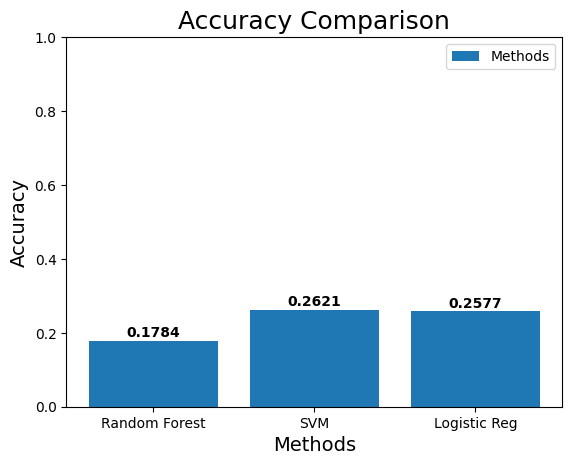

In [ ]:
import matplotlib.pyplot as plt

# Define the data
labels = ['Random Forest', 'SVM', 'Logistic Reg']
values = [accuracy_rforest, accuracy_svm, accuracy_lr]

# Create a bar plot with the specified values
fig, ax = plt.subplots()
ax.bar(labels, values)

# Set the plot title and axis labels
ax.set_title('Accuracy Comparison', fontsize=18)
ax.set_xlabel('Methods', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(['Methods'])

# Set the range of the y-axis
ax.set_ylim(0, 1)

# Add annotations for each bar
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

# Display the plot
plt.show()

## Final Modeling

In [ ]:
# Final modeling with the predicted y into the testing set
final_pred = X_test
final_pred['predicted_sentiment'] = y_pred
final_pred

,comment_sentiment,average_sentiment,sentiment_label,predicted_sentiment
41331,0.0000,0.109935,1,24
919911,0.0000,0.245936,1,24
1861947,0.3612,0.312116,1,10
1245636,0.0000,0.200951,1,24
745315,-0.6808,0.062487,1,24
...,...,...,...,...
1581716,0.5994,0.320967,1,10
1622859,-0.8316,0.223453,1,10
1065655,0.0000,0.439169,1,10
1532878,0.4215,0.078500,1,24
